# Lecture: Statistical Modeling of Clustered Data
<img src="images/complexcarelab.png" alt="Complex Care Lab" style="width: 200px;"/>

## Diego Pinheiro, Ph.D. 
## Lecture Notes on Network Medicine, 



## Outline:
A. Background
1. Covariance and Correlation
2. Clustered and Longitudinal Data 

B. Statistical Tests
1. Two-Sample Unpaired t Test
2. One-Sample Paired t Test
3. Clustered Data and Standard Errors

C. Statistical Modeling
1. Generalized Linear Models (GLM), 
2. Generalized Linear Mixed Models (GLMM), and 
3. Generalized Estimating Equations (GEE)
4. Bayesian Hierarchical Modeling (BHM)

### Learning Objectives 
1. Describe what is and give examples of clustered data;
2. Explain the 3 (three) sources of correlation in longitudinal data;
3. Explain the main difference between unpaired and paired statistical analysis;
4. List the 4 (four) main statistical approaches for modeling clustered data and explain their main differences;
5. Describe how clustered data can affect statistical power;

### References
1. Devore, J. L. (2011). Probability and Statistics for Engineering and the Sciences (9 ed.). Boston, MA: Cengage learning.
2. Fitzmaurice, G. M., Laird, N. M., & Ware, J. H. (2004). Applied Longitudinal Analysis (pp. 1–716). Hoboken, N.J: Wiley-Interscience.
3. Dobson, A. J., & Barnett, A. G. (2008). An Introduction to Generalized Linear Models (pp. 1–316).  Boca Raton: Chapman & Hall/CRC.

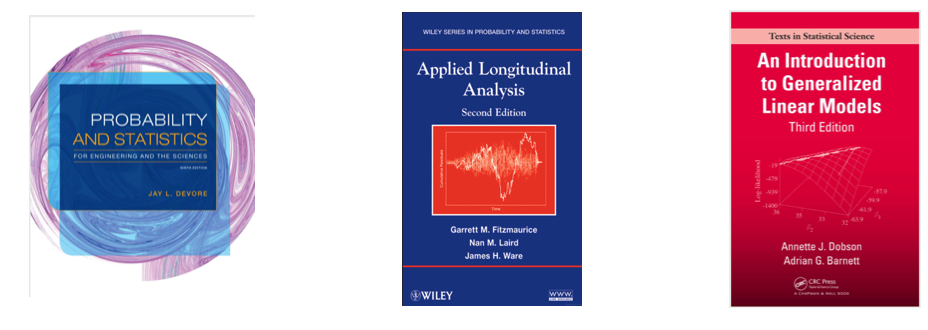

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

## Working Example  <a class="anchor" id="working-example"></a>
Data obtained of Example 9.8 from Devore [1]
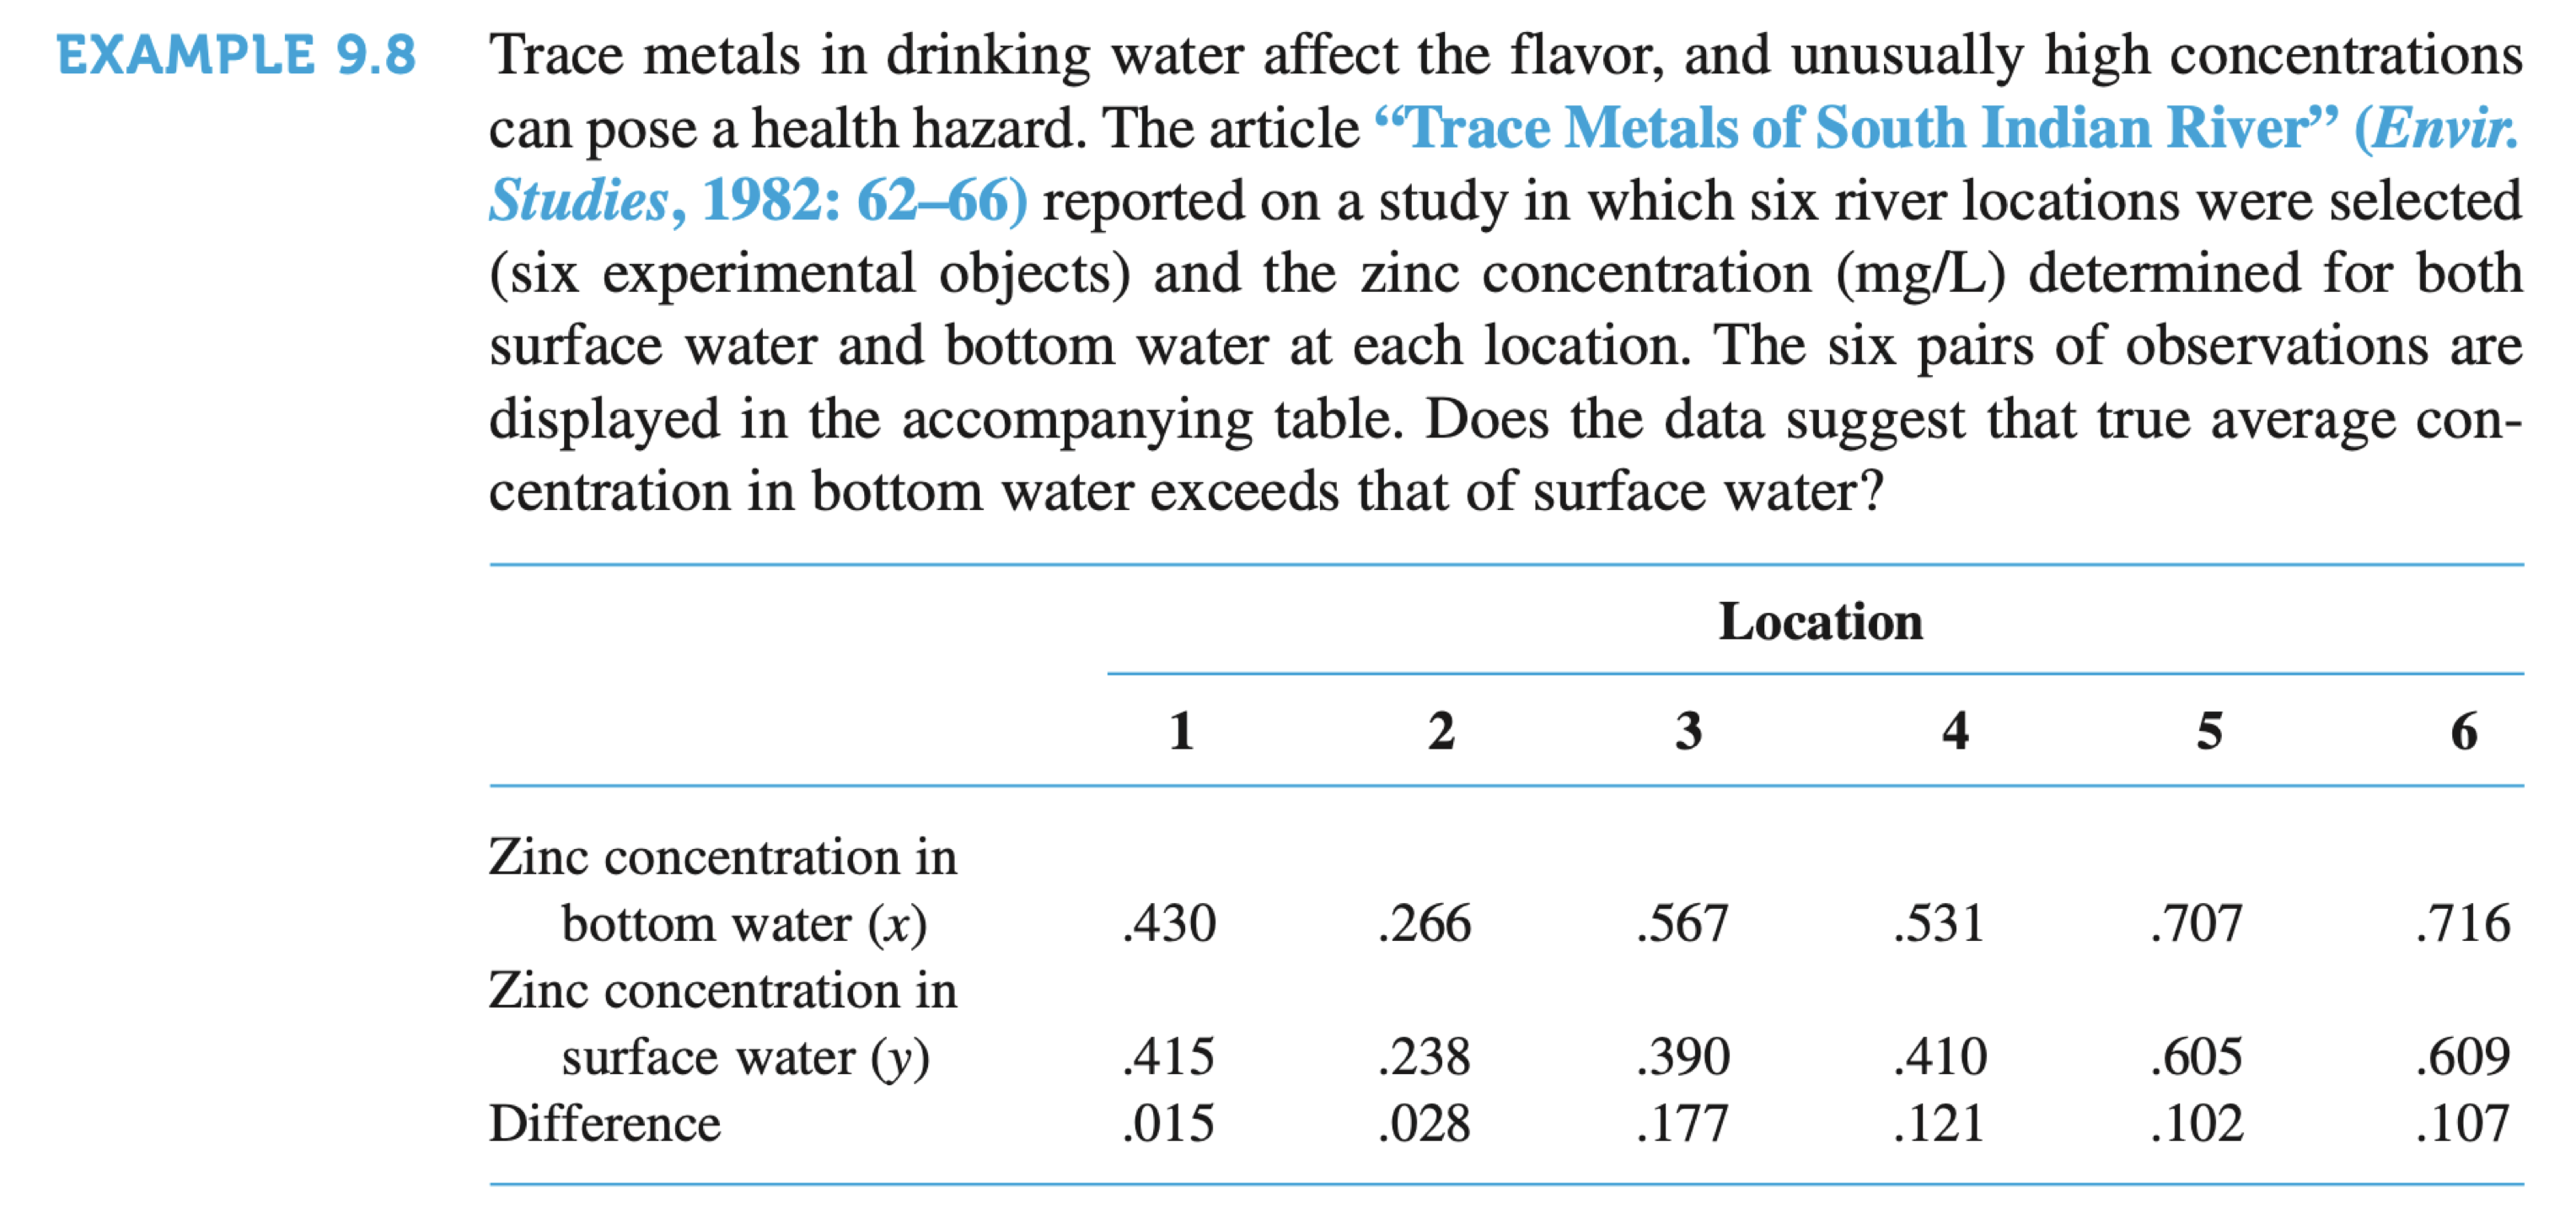



In [2]:
df_zinc_concentration = pd.DataFrame(
    {
        'location': range(1,7),
        'bottom': [.430, .266, .567, .531, .707, .716], 
        'surface': [.415, .238, .390, .410, .605, .609]
    }
)

In [3]:
df_zinc_concentration.head(10)

,location,bottom,surface
0,1,0.430,0.415
1,2,0.266,0.238
2,3,0.567,0.390
3,4,0.531,0.410
4,5,0.707,0.605
5,6,0.716,0.609


In [4]:
df_zinc_concentration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  6 non-null      int64  
 1   bottom    6 non-null      float64
 2   surface   6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 272.0 bytes


In [5]:
df_zinc_concentration[['bottom', 'surface']].mean()

bottom     0.536167
surface    0.444500
dtype: float64

In [6]:
df_zinc_concentration[['bottom', 'surface']].std()

bottom     0.171326
surface    0.141770
dtype: float64

In [7]:
df_zinc_concentration.describe()

,location,bottom,surface
count,6.000000,6.000000,6.00000
mean,3.500000,0.536167,0.44450
std,1.870829,0.171326,0.14177
min,1.000000,0.266000,0.23800
25%,2.250000,0.455250,0.39500
50%,3.500000,0.549000,0.41250
75%,4.750000,0.672000,0.55750
max,6.000000,0.716000,0.60900


## Two-Sample Unpaired t Test


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


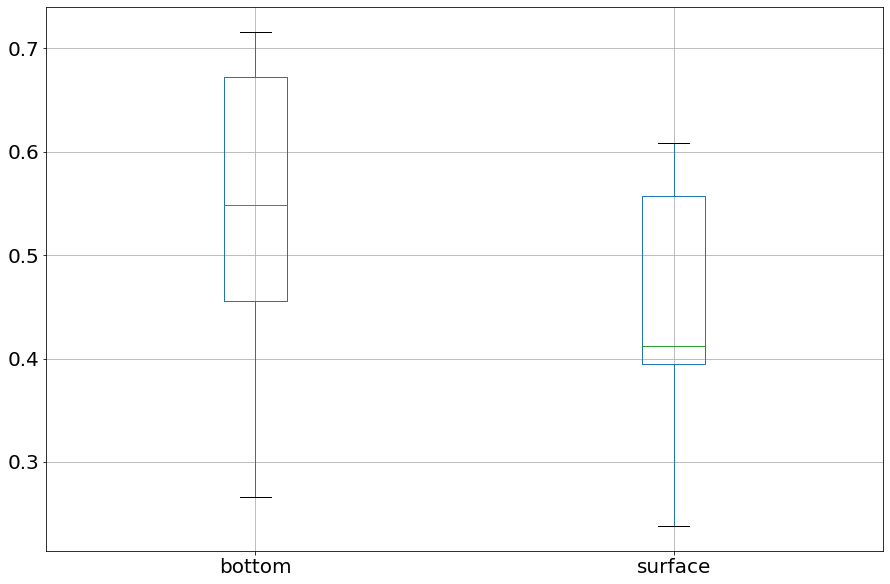

In [8]:
df_zinc_concentration[['bottom', 'surface']].boxplot()

In [9]:
df_zinc_concentration_melted = df_zinc_concentration.melt(id_vars='location', value_vars=['bottom', 'surface'])
df_zinc_concentration_melted

,location,variable,value
0,1,bottom,0.430
1,2,bottom,0.266
2,3,bottom,0.567
3,4,bottom,0.531
4,5,bottom,0.707
5,6,bottom,0.716
6,1,surface,0.415
7,2,surface,0.238
8,3,surface,0.390
9,4,surface,0.410


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


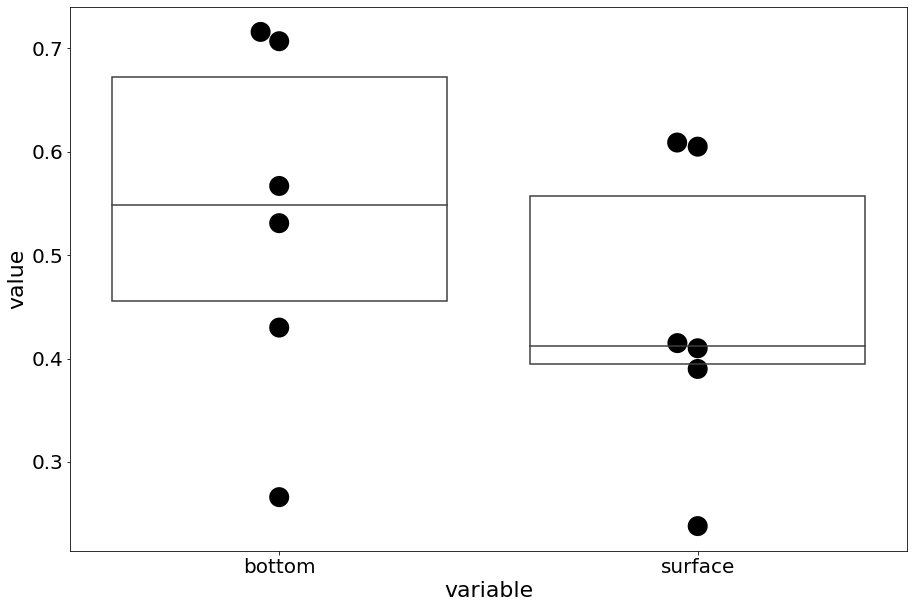

In [10]:
ax = sns.swarmplot(x='variable', y='value',  data=df_zinc_concentration_melted, color='black', s=20)
sns.boxplot(x='variable', y='value', data=df_zinc_concentration_melted,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

In [11]:
import scipy.stats as st
st.ttest_ind(a=df_zinc_concentration['bottom'], b=df_zinc_concentration['surface'])

Ttest_indResult(statistic=1.0097139447330616, pvalue=0.33643940903529834)

## Clustered Data

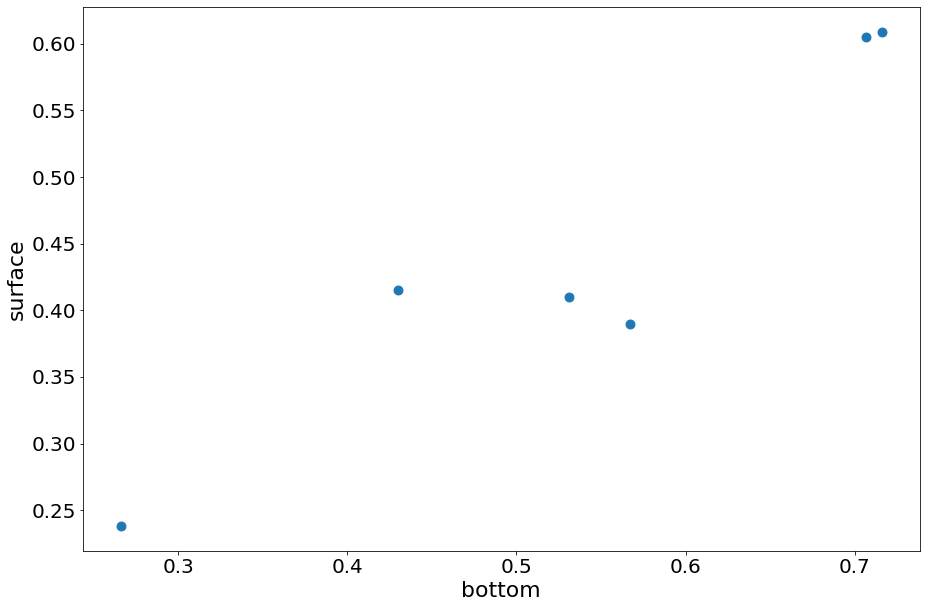

In [12]:
df_zinc_concentration.plot(x='bottom', y='surface', kind='scatter', s=80)

In [13]:
df_zinc_concentration.corr()

,location,bottom,surface
location,1.000000,0.847681,0.788381
bottom,0.847681,1.000000,0.942165
surface,0.788381,0.942165,1.000000


## One-Sample Paired t Test

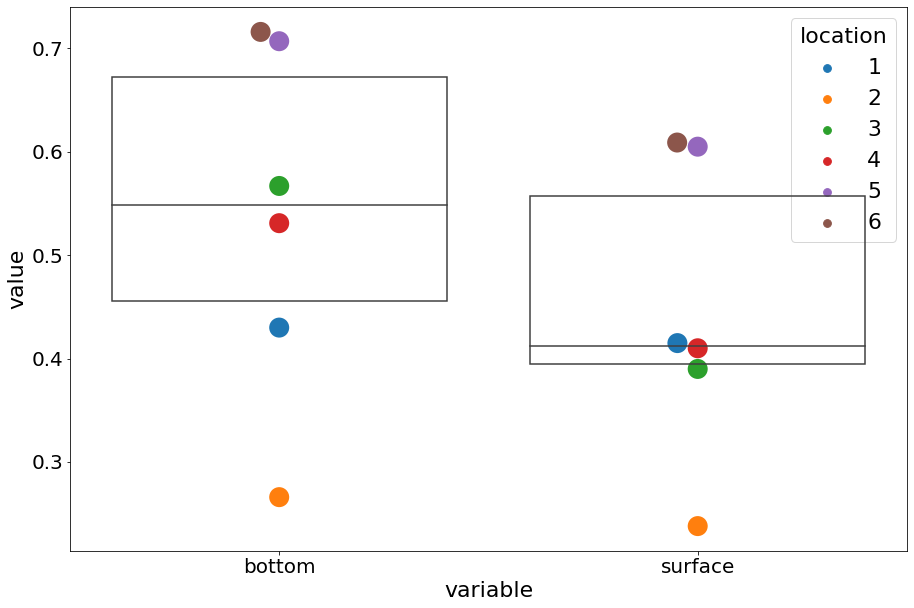

In [14]:
ax = sns.swarmplot(x='variable', y='value',  data=df_zinc_concentration_melted, hue='location', s=20)
sns.boxplot(x='variable', y='value', data=df_zinc_concentration_melted,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

In [15]:
df_zinc_concentration['difference_bottom_surface'] = df_zinc_concentration['bottom'] - df_zinc_concentration['surface']

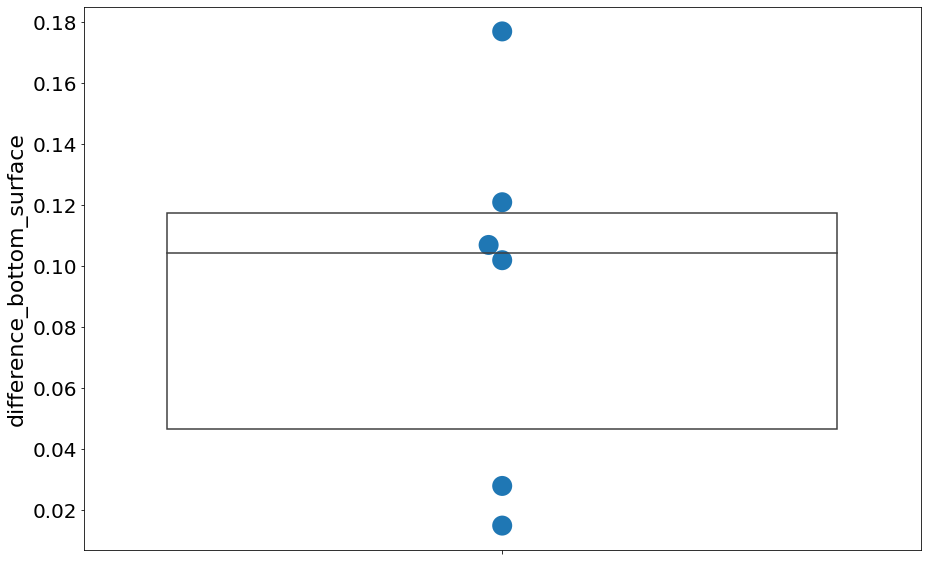

In [16]:
ax = sns.swarmplot(y='difference_bottom_surface',  data=df_zinc_concentration, hue_order='location', s=20)
sns.boxplot(y='difference_bottom_surface', data=df_zinc_concentration,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

### One-Sample Paired t Test

In [17]:
st.ttest_1samp(a=df_zinc_concentration['difference_bottom_surface'], popmean=0)

Ttest_1sampResult(statistic=3.6998343000572875, pvalue=0.014001815832924432)

## Clustered Data and Standard Errors

In [18]:
df_zinc_concentration[['bottom', 'surface']].corr()

,bottom,surface
bottom,1.000000,0.942165
surface,0.942165,1.000000


In [19]:
print(df_zinc_concentration[['bottom', 'surface']].corr().to_latex())

\begin{tabular}{lrr}
\toprule
{} &    bottom &   surface \\
\midrule
bottom  &  1.000000 &  0.942165 \\
surface &  0.942165 &  1.000000 \\
\bottomrule
\end{tabular}



In [20]:
df_zinc_concentration[['bottom', 'surface']].cov()

,bottom,surface
bottom,0.029353,0.022884
surface,0.022884,0.020099


In [21]:
print(df_zinc_concentration[['bottom', 'surface']].cov().to_latex())

\begin{tabular}{lrr}
\toprule
{} &    bottom &   surface \\
\midrule
bottom  &  0.029353 &  0.022884 \\
surface &  0.022884 &  0.020099 \\
\bottomrule
\end{tabular}



In [22]:
var_bottom = df_zinc_concentration.cov()['bottom']['bottom']
var_surface = df_zinc_concentration.cov()['surface']['surface']
cov_surface_bottom = df_zinc_concentration.cov()['surface']['bottom']

### Error independent modeling

In [23]:
n = df_zinc_concentration.shape[0]

In [24]:
std_error_independent = np.sqrt(var_bottom/n + var_surface /n)
std_error_independent

0.09078478825099377

### Error Clustered Modeling 

In [25]:
std_error_dependent = np.sqrt(var_bottom/n + var_surface /n - 2*cov_surface_bottom/ n)
std_error_dependent

0.024775884332238145

In [26]:
std_error_independent / std_error_dependent 

3.6642400744850696

# Statistical Modeling

In [27]:
import statsmodels.formula.api as smf
from statsmodels.genmod.families import Gaussian, Binomial, NegativeBinomial
fam = Gaussian()

## Generalized Linear Models (GLM)

In [28]:
model = smf.glm(formula='value ~ C(variable, Treatment(reference="surface"))', data=df_zinc_concentration_melted, family=fam)
model = model.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  value   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.024726
Method:                          IRLS   Log-Likelihood:                 6.2662
Date:                Mon, 13 Jul 2020   Deviance:                      0.24726
Time:                        16:31:38   Pearson chi2:                    0.247
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

## Generalized Linear Mixed Models (GLMM)

In [29]:
model = smf.mixedlm(formula='value ~ C(variable, Treatment(reference="surface"))', 
                    data=df_zinc_concentration_melted, 
                    groups=df_zinc_concentration_melted['location'])
model = model.fit()
print(model.summary())

                            Mixed Linear Model Regression Results
Model:                          MixedLM               Dependent Variable:               value 
No. Observations:               12                    Method:                           REML  
No. Groups:                     6                     Scale:                            0.0018
Min. group size:                2                     Log-Likelihood:                   7.3735
Max. group size:                2                     Converged:                        Yes   
Mean group size:                2.0                                                           
----------------------------------------------------------------------------------------------
                                                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                             0.445    0.064 6.924 0.00

## Generalized Estimating Equations (GEE)


In [30]:
from statsmodels.genmod.cov_struct import Exchangeable, Independence, Autoregressive, CovStruct, Nested
model = smf.gee(formula='value ~ C(variable, Treatment(reference="surface"))', 
                data=df_zinc_concentration_melted,
               groups=df_zinc_concentration_melted['location'])
model = model.fit()
print(model.summary())

                               GEE Regression Results                              
Dep. Variable:                       value   No. Observations:                   12
Model:                                 GEE   No. clusters:                        6
Method:                        Generalized   Min. cluster size:                   2
                      Estimating Equations   Max. cluster size:                   2
Family:                           Gaussian   Mean cluster size:                 2.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 13 Jul 2020   Scale:                           0.025
Covariance type:                    robust   Time:                         16:31:38
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------


## Bayesian Hierarchical Modeling (BHM)

In [31]:
import pymc3 as pm

y_observed = df_zinc_concentration_melted['value'].values
treatments = df_zinc_concentration_melted['variable'].apply(lambda x: 1 if x == 'bottom' else 0)
group_ids = [i-1 for i in df_zinc_concentration_melted['location'].values]
n_groups = len(np.unique(group_ids))

with pm.Model() as hierarchical_model:
    mu_intercept = pm.Normal('mu_intercept', mu=0, sigma=1)
    sigma_intercept = pm.HalfNormal('sigma_intercept', 5.)
    mu_surface = pm.Normal('mu_surface', mu=0., sigma=1)
    location_intercept = pm.Normal('intercept', mu=mu_intercept, sigma=sigma_intercept, shape=n_groups)
    eps = pm.HalfCauchy('eps', 5.)
    est = mu_intercept + location_intercept[group_ids] + mu_surface*treatments
    like = pm.Normal('like', mu=est, sigma=eps, observed=y_observed)
    hierarchical_trace = pm.sample()

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, intercept, mu_surface, sigma_intercept, mu_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/home/jovyan/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


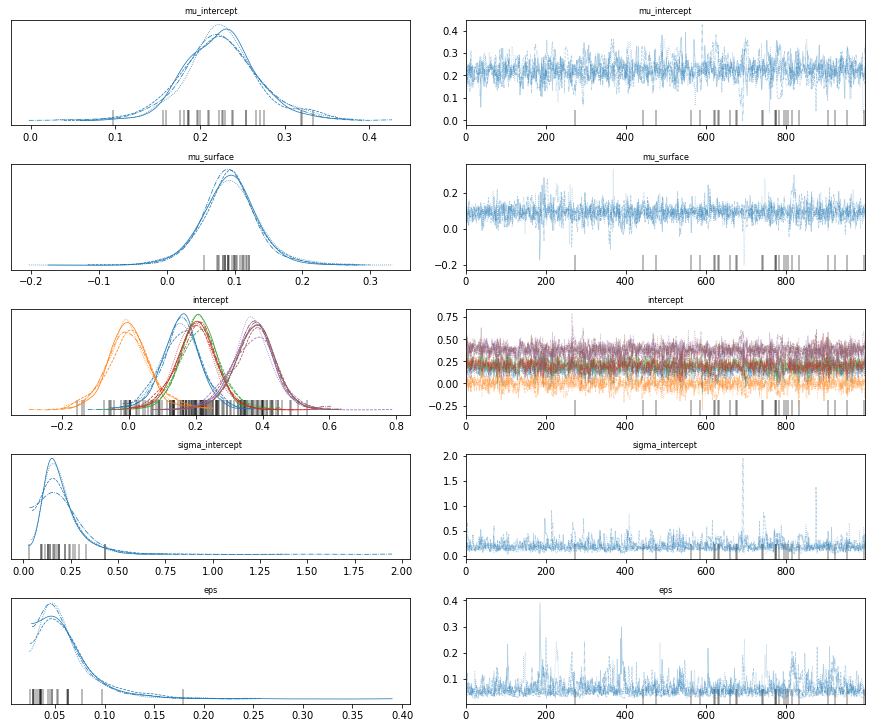

In [32]:
pm.traceplot(hierarchical_trace)
plt.show()

In [33]:
pm.summary(hierarchical_trace)

/home/jovyan/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_intercept,0.225,0.045,0.144,0.320,0.002,0.001,593.0,579.0,617.0,773.0,1.0
mu_surface,0.093,0.041,0.011,0.170,0.001,0.001,1433.0,1053.0,1522.0,981.0,1.0
intercept[0],0.157,0.061,0.045,0.279,0.002,0.001,846.0,846.0,853.0,1011.0,1.0
intercept[1],0.001,0.067,-0.133,0.132,0.002,0.002,882.0,805.0,901.0,906.0,1.0
intercept[2],0.208,0.060,0.094,0.323,0.002,0.001,911.0,911.0,913.0,1097.0,1.0
intercept[3],0.201,0.060,0.080,0.305,0.002,0.001,846.0,846.0,836.0,1293.0,1.0
intercept[4],0.371,0.063,0.242,0.485,0.002,0.002,773.0,773.0,764.0,1105.0,1.0
intercept[5],0.376,0.063,0.252,0.490,0.002,0.002,834.0,834.0,838.0,1285.0,1.0
sigma_intercept,0.202,0.114,0.061,0.386,0.004,0.003,801.0,801.0,787.0,1011.0,1.0
eps,0.062,0.030,0.026,0.113,0.001,0.001,575.0,575.0,516.0,672.0,1.0
